In [5]:
!pip install Jieba

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
import jieba  # Chinese text segmentation

import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('/content/drive/MyDrive/Santi_dataset.csv')
df=df.dropna()

,Textid,ChnText,EngText,Chn_Sentiment,Eng_Sentiment
0,1,她挥舞着战旗，挥动着自己燃烧的青春，敌人将在这火焰中化为灰烬，理想世界明天就会在她那沸腾的热...,She waved the battle banner as though brandish...,1.0,1.0
1,2,她陶醉在这鲜红灿烂的梦幻中，直到被一颗步枪子弹洞穿了胸膛，十五岁少女的胸膛是那么柔嫩，那颗子...,"She was intoxicated by her brilliant, crimson ...",-1.0,-1.0
2,3,你父亲在回忆这件事后，对我发出这样的感叹：在中国，任何超脱飞扬的思想都会砰然坠地的，现实的引...,"After your father recounted this memory to me,...",-1.0,-1.0
3,4,也许，人类和邪恶的关系，就是大洋与漂浮于其上的冰山的关系，它们其实是同一种物质组成的巨大水体...,Is it possible that the relationship between ...,-1.0,-1.0
4,5,在西方的天际，正在云海中下沉的夕阳仿佛被融化了，太阳的血在云海和天空中弥漫开来，映现出一大片...,"Over the western horizon, the sun that was slo...",-1.0,-1.0
...,...,...,...,...,...
1069,1070,当年，古罗马人在宏伟华丽的浴宫中吹着口哨，认为帝国就像身下的浴池一样，建在整块花岗岩上，将永...,"Once, ancient Romans had whistled in their gra...",0.0,0.0
1070,1071,即使这样公主也不能去！,"“Even so, the princess cannot go.",-1.0,-1.0
1071,1072,这是迄今为止对黑暗森林理论最有力的证明，但三体世界本身所掌握的证据和其论证的过程一直不得而知...,"This was, to date, the most convincing proof f...",0.0,0.0
1072,1073,在减速开始后第五天，突然，所有身处四维的人都在一瞬间回到了三维，他们都不是经由翘曲点回来的。,"On the fifth day after beginning acceleration,...",0.0,0.0


In [57]:
X_train, X_test, y_train, y_test = train_test_split(df['EngText'], df['Eng_Sentiment'], test_size=0.2, random_state=42)
model = make_pipeline(TfidfVectorizer(), MultinomialNB())


model.fit(X_train, y_train)
# Evaluate the model
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))


Accuracy: 0.514018691588785


In [70]:
file_path = "/content/drive/Othercomputers/我的计算机/340_Final_Project/ThreeBody03.txt"

with open(file_path, 'r', encoding='utf-8') as file:
    content = file.read()

content = content.replace("\n", "")




In [73]:
# Divide the novel into chunks
chunk_size = 10 # characters per chunk

def divide_into_chunks(text, size):
    return [text[i:i + size] for i in range(0, len(text), size)]

chunks = divide_into_chunks(content, chunk_size)







In [74]:
plot_list = []
for chunk in chunks:
    # Predict sentiment for each chunk
    prediction = model.predict([chunk])  # Note the square brackets to make it a list
    prediction_prob = model.predict_proba([chunk])

    # Check if the prediction is -1 and append the probability to the list
    if prediction == -1:  # Access the first element since it's a list
      plot_list.append(-prediction_prob[0])  # Access the first element of prediction_prob
    elif prediction ==0:
      plot_list.append(prediction)
    else:
      # print('positive detected')
      # print(prediction_prob[0])
      plot_list.append(prediction_prob[0])

concatenated_array = np.concatenate(plot_list)

print(concatenated_array)

positive detected
[0.22155655 0.38645952 0.39198393]
positive detected
[0.22088039 0.38528011 0.3938395 ]
positive detected
[0.22088039 0.38528011 0.3938395 ]
positive detected
[0.20835557 0.36343315 0.42821128]
positive detected
[0.22088039 0.38528011 0.3938395 ]
positive detected
[0.22088039 0.38528011 0.3938395 ]
positive detected
[0.20835557 0.36343315 0.42821128]
positive detected
[0.22088039 0.38528011 0.3938395 ]
positive detected
[0.22088039 0.38528011 0.3938395 ]
positive detected
[0.22088039 0.38528011 0.3938395 ]
positive detected
[0.22088039 0.38528011 0.3938395 ]
positive detected
[0.20835557 0.36343315 0.42821128]
positive detected
[0.20835557 0.36343315 0.42821128]
positive detected
[0.20835557 0.36343315 0.42821128]
positive detected
[0.20835557 0.36343315 0.42821128]
positive detected
[0.20835557 0.36343315 0.42821128]
positive detected
[0.22088039 0.38528011 0.3938395 ]
positive detected
[0.22088039 0.38528011 0.3938395 ]
positive detected
[0.22088039 0.38528011 0.393

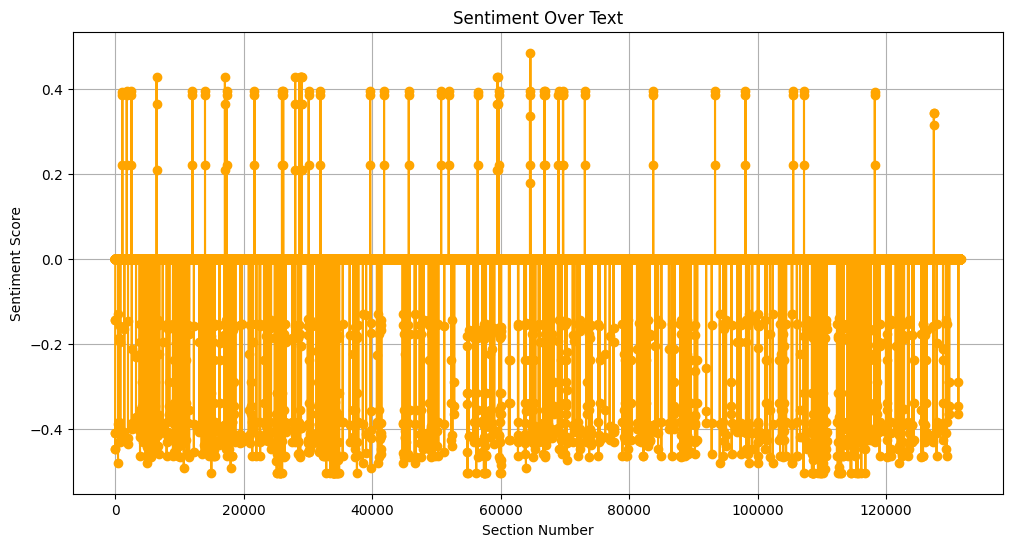

<Figure size 640x480 with 0 Axes>

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(concatenated_array, marker='o', linestyle='-',color='Orange')
plt.title('Sentiment Over Text')
plt.xlabel('Section Number')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()
plt.savefig('/content/drive/MyDrive/SentimentOverText1.png',format='png', dpi=300)
